In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import trim_mean


### Reading and exploring the data

In [14]:
df=pd.read_csv('Life Expectancy Data.csv')

In [15]:
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [16]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


(1999.0, 2016.0, 0.0, 80.0)

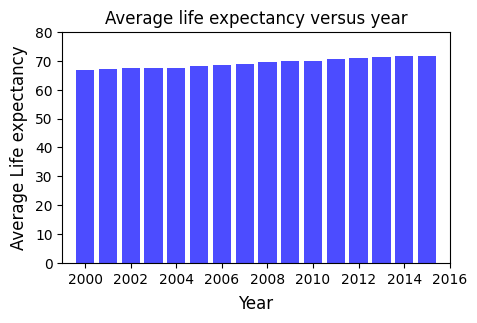

In [29]:
Life_expectancy=df.groupby('Year')['Life expectancy '].mean().to_frame().reset_index()
year=Life_expectancy['Year']
Lf=Life_expectancy['Life expectancy ']
plt.figure(figsize=(5,3))
plt.bar(year, Lf, label = 'Total Crimes',color='b',alpha=0.7) 
plt.title("Average life expectancy versus year")
plt.xlabel("Year",fontsize=12,labelpad=6)
plt.ylabel("Average Life expectancy",fontsize=12,labelpad=5)
plt.axis([1999, 2016, 0, 80])
#plt.xticks(np.arange(1999,2016,1),fontsize=16)
#plt.yticks(fontsize=16)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [80]:
df.groupby('Year')['Year'].mean()

Year
2000    2000.0
2001    2001.0
2002    2002.0
2003    2003.0
2004    2004.0
2005    2005.0
2006    2006.0
2007    2007.0
2008    2008.0
2009    2009.0
2010    2010.0
2011    2011.0
2012    2012.0
2013    2013.0
2014    2014.0
2015    2015.0
Name: Year, dtype: float64

### Let's find the number of null values

In [135]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [23]:
df1=df.copy()

In [24]:
low_nulls= ['Life expectancy ', 'Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ', 
             ' thinness  1-19 years', ' thinness 5-9 years']
for column in low_nulls:
    df[column]=df[column].fillna(value=trim_mean(df[column],0.1))

In [137]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                           0
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    167
Schooling                          163
dtype: int64

In [21]:
df2=df.copy()

In [22]:
df2.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
df.rename(columns=lambda x: x.strip(), inplace=True) 

In [18]:
df.duplicated().sum()

0

### Finding correlation matrix

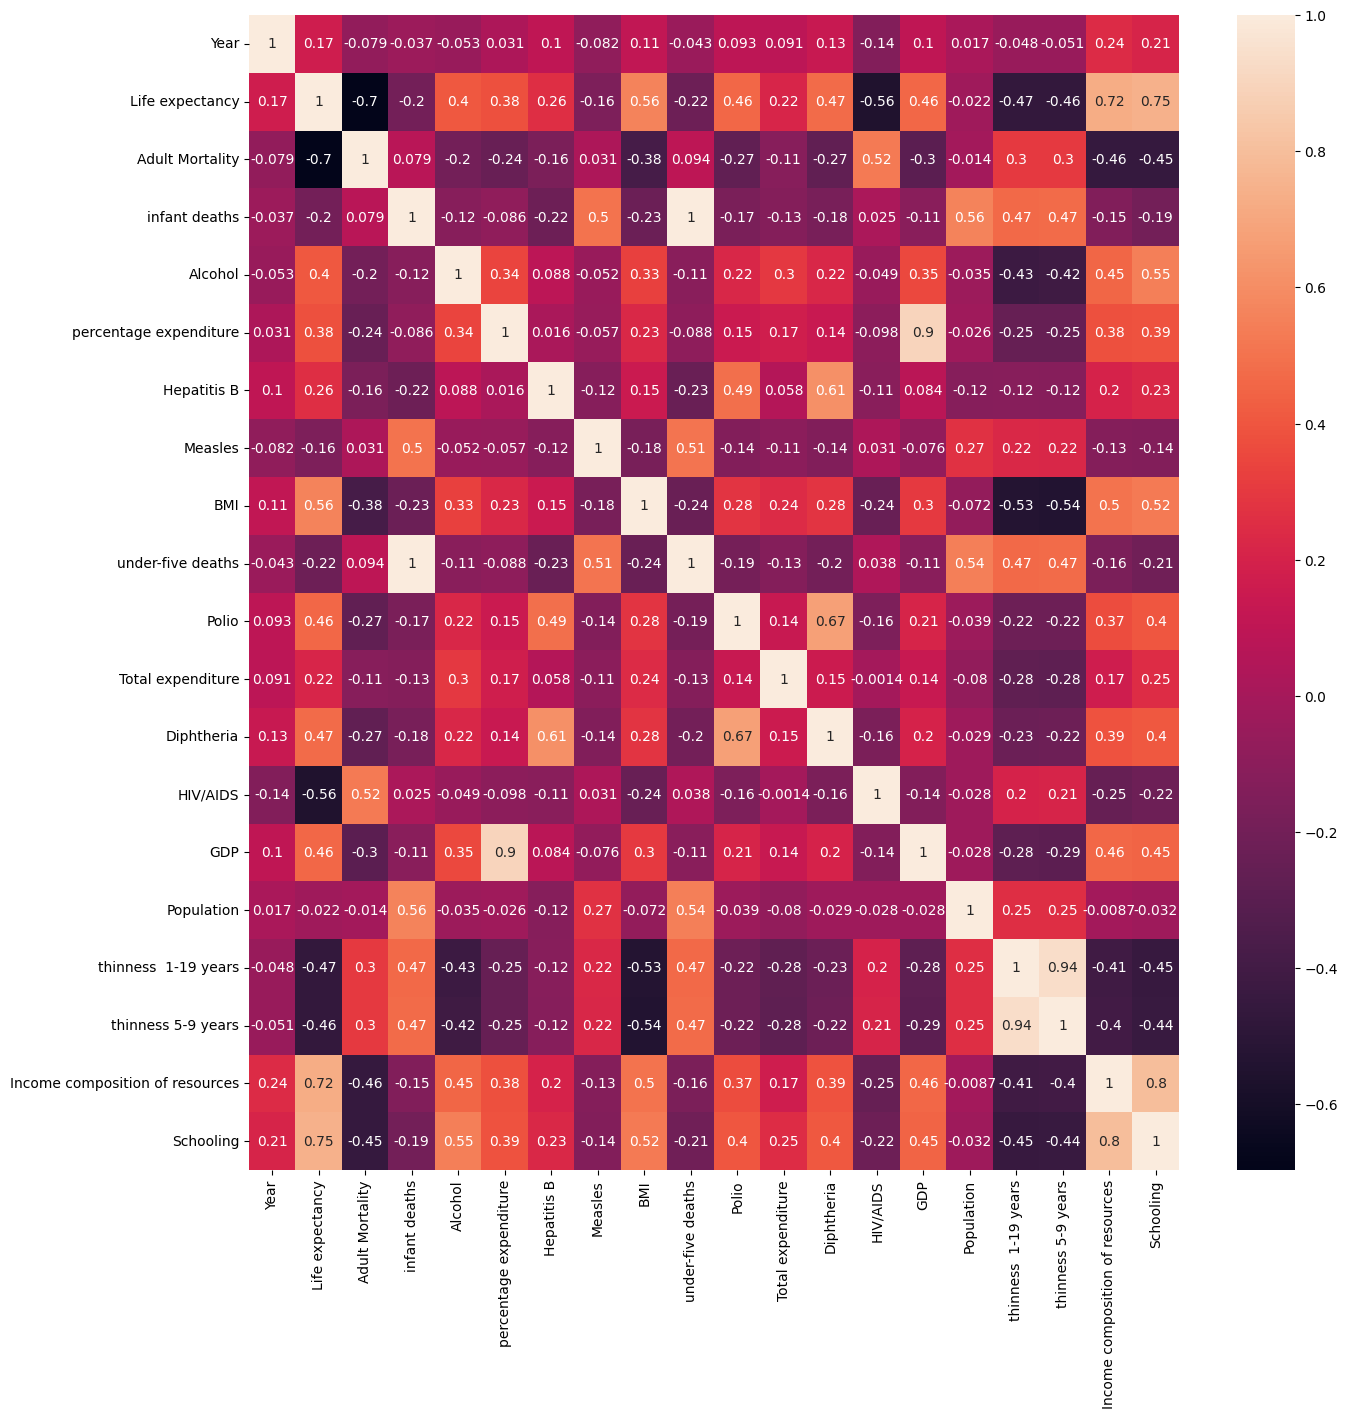

In [26]:
corr_data=df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_data, annot = True, ax = ax)
plt.show()

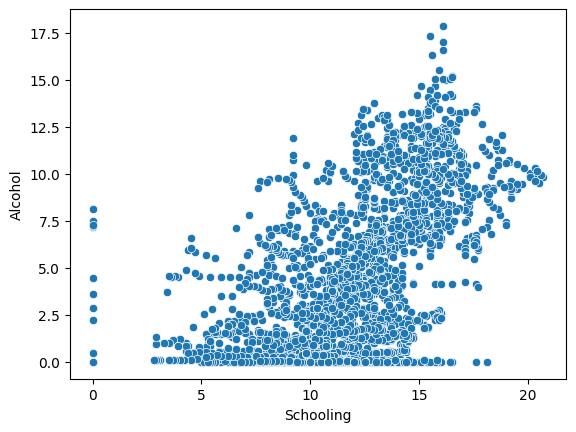

In [46]:
sns.scatterplot(x=df['Schooling'],y=df['Alcohol'])
plt.show()

In [27]:
under_5 = df.loc[(df['Schooling'] < 5) & (df['Schooling'] != 0)]['Alcohol'].mean()
between_5_10 = df.loc[(df['Schooling'] >= 5) & (df['Schooling'] < 10)]['Alcohol'].mean()
between_10_15 =df.loc[(df['Schooling'] >= 10) & (df['Schooling'] < 15)]['Alcohol'].mean()
above_15 = df.loc[(df['Schooling'] >= 15)]['Alcohol'].mean()
print(f'under 5: {under_5}, between 10 and 5: {between_5_10}, between 10 and 15: {between_10_15}, above 15: {above_15}')

under 5: 1.731086956521739, between 10 and 5: 2.070127272727273, between 10 and 15: 4.084567983924983, above 15: 8.914028925619833


In [28]:
#fill the Null values in Alcohol Column
df.loc[(df['Schooling'] < 5) & (df['Schooling'] != 0) & (df['Alcohol'].isnull()), ['Alcohol']] = under_5
df.loc[(df['Schooling'] >= 5) & (df['Schooling'] < 10) & (df['Alcohol'].isnull()), ['Alcohol']] = between_5_10 
df.loc[(df['Schooling'] >= 10) & (df['Schooling'] < 15) & (df['Alcohol'].isnull()), ['Alcohol']] = between_10_15
df.loc[(df['Schooling'] >= 15) & (df['Alcohol'].isnull()), ['Alcohol']] = above_15

In [29]:
df['Alcohol']=df['Alcohol'].fillna(value=trim_mean(df['Alcohol'],0.1))

In [109]:
df['Alcohol'].isnull().sum()

0

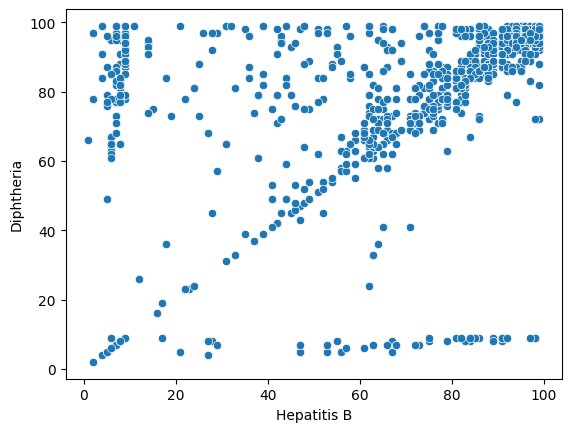

In [30]:
#scatterplot between Hepatatis B and Diptheria
sns.scatterplot(x=df['Hepatitis B'],y=df['Diphtheria'])
plt.show()

In [101]:
#grouping
under_20 = df.loc[df['Diphtheria'] < 20]['Hepatitis B'].mean()
between_20_40 = df.loc[(df['Diphtheria'] >= 20) & (df['Diphtheria'] < 40)]['Hepatitis B'].mean()
between_40_60 =df.loc[(df['Diphtheria'] >= 40) & (df['Diphtheria'] < 60)]['Hepatitis B'].mean()
between_60_80 =df.loc[(df['Diphtheria'] >= 60) & (df['Diphtheria'] < 80)]['Hepatitis B'].mean()
above_80 = df.loc[(df['Diphtheria'] >= 80)]['Hepatitis B'].mean()
print(f'under 20: {under_20}, between 20 and 40: {between_20_40}, between 40 and 60: {between_40_60}, between 60 and 80: {between_60_80}')

under 20: 36.23387096774194, between 20 and 40: 34.93333333333333, between 40 and 60: 48.35294117647058, between 60 and 80: 63.63742690058479


In [102]:
#fill the Null values in Hepatitis B Column
df.loc[(df['Diphtheria'] < 20) & (df['Hepatitis B'].isnull()), ['Hepatitis B']] = under_20
df.loc[(df['Diphtheria'] >= 20) & (df['Diphtheria'] < 40) & (df['Hepatitis B'].isnull()), ['Hepatitis B']] = between_20_40 
df.loc[(df['Diphtheria'] >= 40) & (df['Diphtheria'] < 60) & (df['Hepatitis B'].isnull()), ['Hepatitis B']] = between_40_60 
df.loc[(df['Diphtheria'] >= 60) & (df['Diphtheria'] < 80) & (df['Hepatitis B'].isnull()), ['Hepatitis B']] = between_60_80
df.loc[(df['Diphtheria'] >= 80) & (df['Hepatitis B'].isnull()), ['Hepatitis B']] = above_80

In [27]:
df['Hepatitis B'].isnull().sum()

0

In [103]:
df['Total expenditure']=df['Total expenditure'].fillna(value=trim_mean(df['Total expenditure'],0.1))

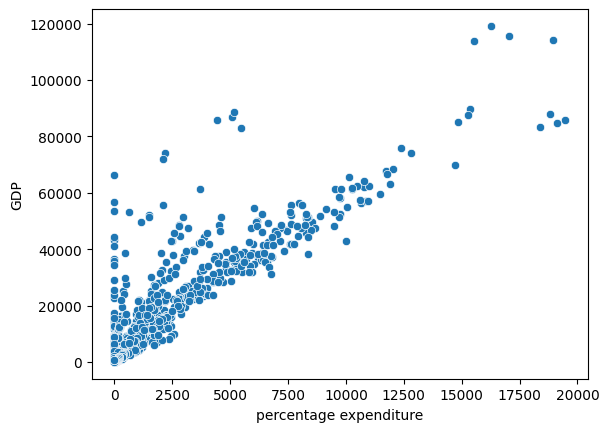

In [145]:
sns.scatterplot(x=df['percentage expenditure'],y=df['GDP']);

In [34]:
#dropping the Null values to make a non-Null dataframe for training
GDPTrain = df[['percentage expenditure', 'GDP']].dropna(how = 'any')

#The X axis of dolumns with Null values
GDPTest_x = df.loc[df['GDP'].isnull(), ['percentage expenditure']]

In [35]:
 df.loc[df['GDP'].isnull(), ['percentage expenditure']]

,percentage expenditure
160,0.0
161,0.0
162,0.0
163,0.0
164,0.0
...,...
2901,0.0
2902,0.0
2903,0.0
2904,0.0


In [75]:
pip install sklearn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
#defining the model using Sklearn library
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = np.array(GDPTrain['percentage expenditure']).reshape(-1,1)
y = np.array(GDPTrain.GDP).reshape(-1,1)
reg_model = reg.fit(X, y)
reg_model.coef_

array([[6.01851823]])

In [37]:
#predicting the Null values with our reg_model
xtest = np.array(GDPTest_x).reshape(-1,1)
y_pred = reg.predict(xtest)

In [38]:
#filling up the Null values with predicted values from regression
df.loc[df['GDP'].isnull(), ['GDP']] = y_pred

In [39]:
#checking whether any null values remained in GDP
df['GDP'].isnull().sum()

0

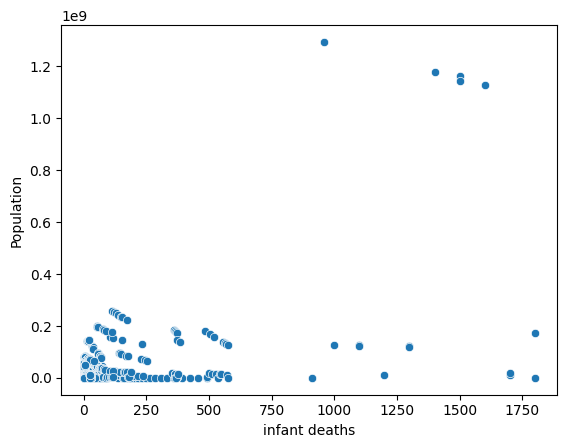

In [40]:
#scatterplot between infant deaths and Population
sns.scatterplot(x=df['infant deaths'],y=df['Population']);

In [41]:
#number of null values in population column
df['Population'].isnull().sum()

652

In [42]:
countries = df[['Country','Population', 'Year']]

In [43]:
dff=pd.read_csv('WPP2019_TotalPopulationBySex.csv')

In [44]:
dff

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


In [45]:
population = dff[['Location', 'Time', 'PopTotal']]

In [46]:
merged = pd.merge(countries, population, how = 'left', left_on = ['Country', 'Year'], right_on = ['Location', 'Time'])
merged.head()

,Country,Population,Year,Location,Time,PopTotal
0,Afghanistan,33736494.0,2015,Afghanistan,2015.0,34413.603
1,Afghanistan,327582.0,2014,Afghanistan,2014.0,33370.804
2,Afghanistan,31731688.0,2013,Afghanistan,2013.0,32269.592
3,Afghanistan,3696958.0,2012,Afghanistan,2012.0,31161.378
4,Afghanistan,2978599.0,2011,Afghanistan,2011.0,30117.411


In [47]:
# substitute the Population values
df['Population'] = merged['PopTotal']

In [48]:
df['Population'].isnull().sum()

80

In [49]:
df['Population']=df['Population'].fillna(method ='ffill')

In [45]:
df['Population'].isnull().sum()

0

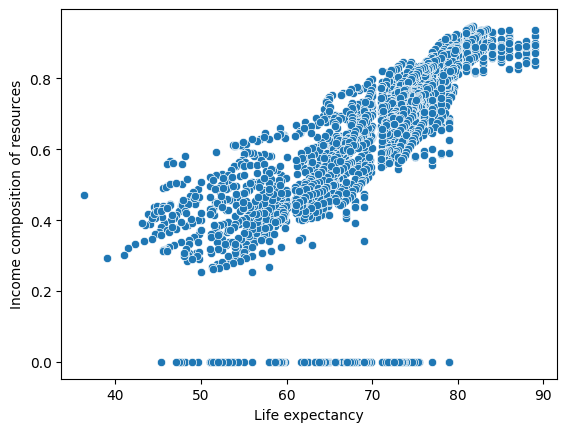

In [128]:
sns.scatterplot(x=df['Life expectancy'],y=df['Income composition of resources']);

In [86]:
#dropping the Null values to make a non-Null dataframe for training
incomeTrain = df[['Income composition of resources', 'Life expectancy']].dropna(how = 'any')

#let's drop the zero values as well
incomeTrain = incomeTrain.loc[(incomeTrain!=0).all(axis=1)]
incomeTrain

,Income composition of resources,Life expectancy
0,0.479,65.0
1,0.476,59.9
2,0.470,59.9
3,0.463,59.5
4,0.454,59.2
...,...,...
2933,0.407,44.3
2934,0.418,44.5
2935,0.427,44.8
2936,0.427,45.3


In [87]:
incomeTrain = df[['Income composition of resources', 'Life expectancy']].dropna(how = 'any')

incomeTrain.loc[(incomeTrain!=0).any(axis=1)]

,Income composition of resources,Life expectancy
0,0.479,65.0
1,0.476,59.9
2,0.470,59.9
3,0.463,59.5
4,0.454,59.2
...,...,...
2933,0.407,44.3
2934,0.418,44.5
2935,0.427,44.8
2936,0.427,45.3


In [88]:
#defining the model using Sklearn library
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = np.array(incomeTrain['Life expectancy']).reshape(-1,1)
y = np.array(incomeTrain['Income composition of resources']).reshape(-1,1)
reg_model = reg.fit(X, y)
reg_model.coef_

array([[0.01633621]])

In [94]:
incomeTest_x = df.loc[df['Income composition of resources'].isnull(), ['Life expectancy']]

In [92]:
np.array(incomeTest_x).reshape(-1,1)

array([], shape=(0, 1), dtype=float64)

In [ ]:
#predicting the Null values with our reg_model
xtest = np.array(incomeTest_x).reshape(-1,1)
y_pred = reg.predict(xtest)

#filling up the Null values with predicted values from regression
df.loc[df['Income composition of resources'].isnull(), ['Income composition of resources']] = y_pred

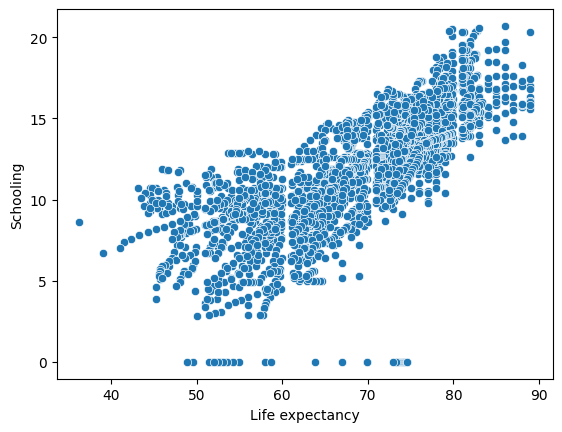

In [95]:
sns.scatterplot(x=df['Life expectancy'],y=df['Schooling']);

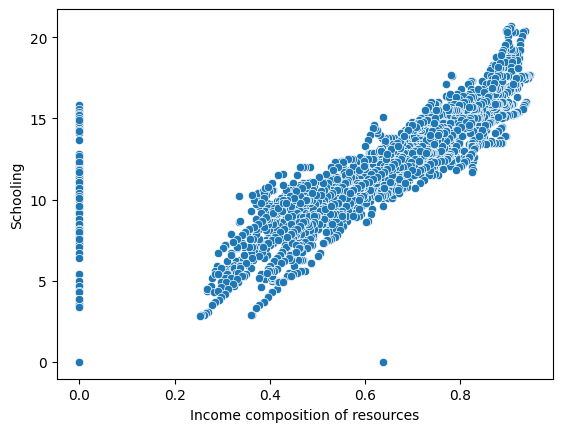

In [188]:
sns.scatterplot(x=df['Income composition of resources'],y=df['Schooling']);

In [96]:
#dropping the Null values to make a non-Null dataframe for training
schoolingTrain = df[['Income composition of resources', 'Schooling']].dropna(how = 'any')

#let's drop the zero values as well
schoolingTrain = schoolingTrain.loc[(schoolingTrain!=0).any(axis=1)]

In [97]:
#defining the model using Sklearn library
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = np.array(schoolingTrain['Income composition of resources']).reshape(-1,1)
y = np.array(schoolingTrain['Schooling']).reshape(-1,1)
reg_model = reg.fit(X, y)
reg_model.coef_

array([[12.09977234]])

In [98]:
#defining the x test which is income column corresponding to schooling entries with null values
schoolingTest_x = df.loc[df['Schooling'].isnull(), ['Income composition of resources']]

In [ ]:
#predicting the Null values with our reg_model
xtest = np.array(schoolingTest_x).reshape(-1,1)
y_pred = reg.predict(xtest)

#filling up the Null values with predicted values from regression
df.loc[df['Schooling'].isnull(), ['Schooling']] = y_pred

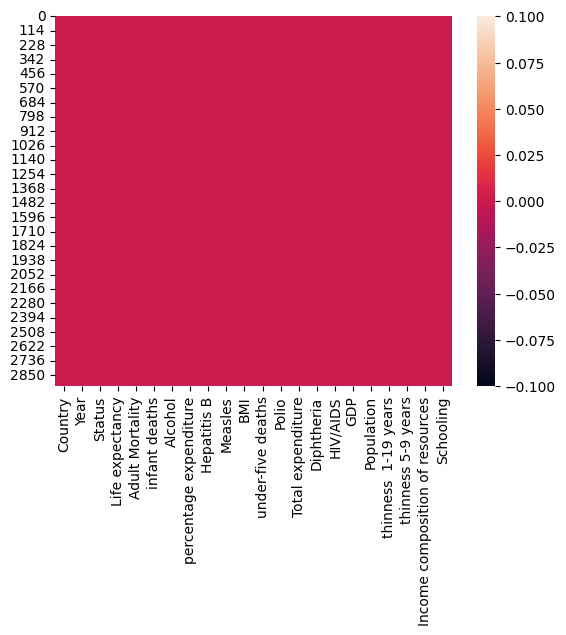

In [104]:
#plotting the remaining Null values
sns.heatmap(pd.isnull(df))
plt.show()

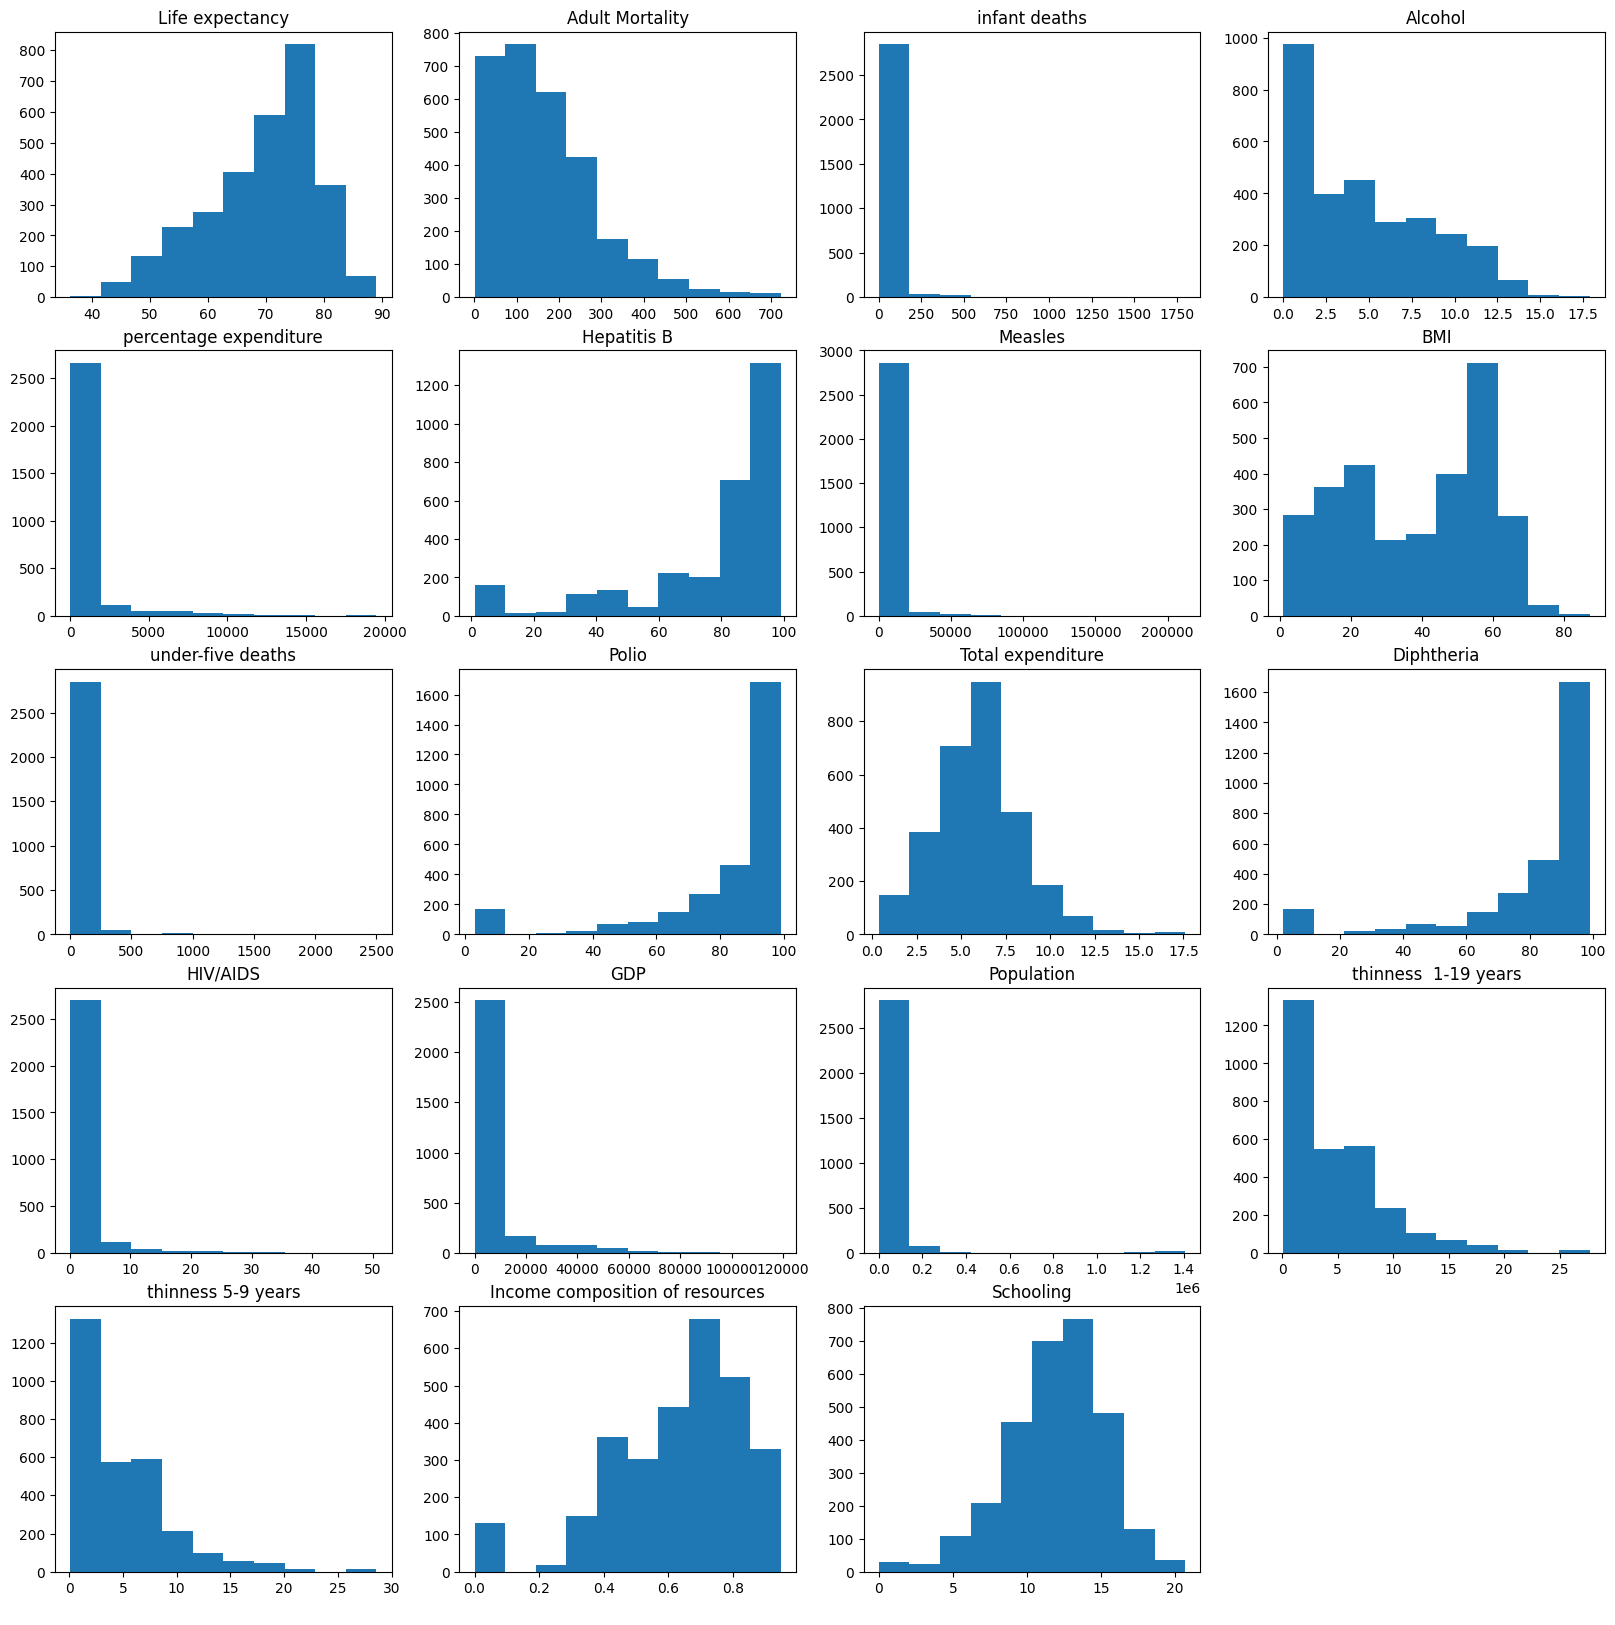

In [106]:
#histograms
numerical_columns = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 
                     'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 
                     'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
                     'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
                     'Schooling']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(' ')

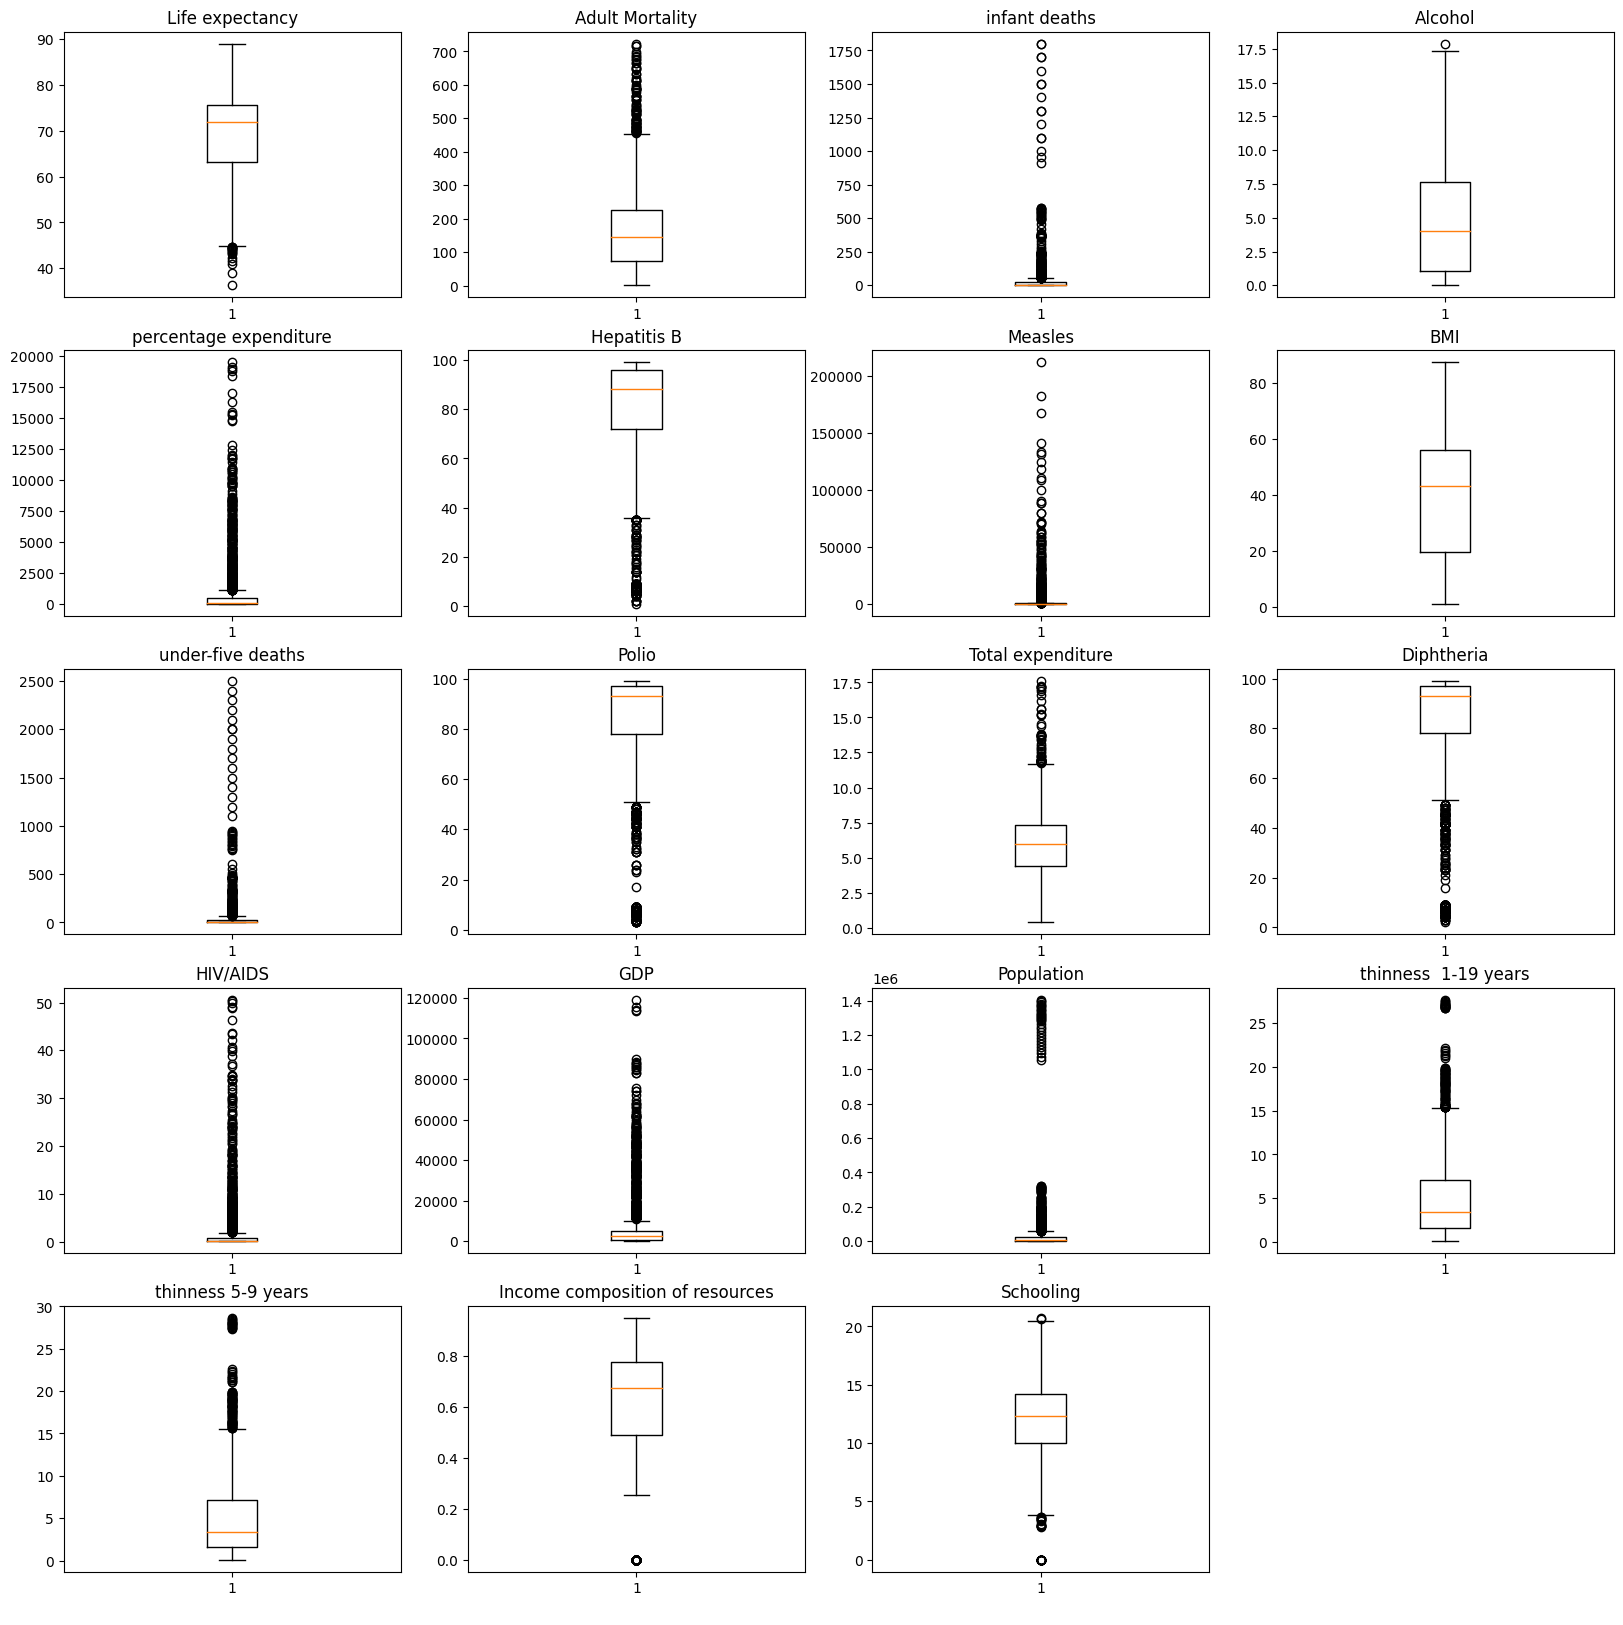

In [65]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    plt.boxplot(df[col])
    plt.title(col)
    plt.xlabel(' ')

In [225]:
# grouping the data by country - calculating the mean of life expectency - sorting the data
highest_avg_life = df.groupby('Country')['Life expectancy'].mean().sort_values(ascending = False).head(5)
lowest_avg_life = df.groupby('Country')['Life expectancy'].mean().sort_values(ascending = True).head(5)


print(highest_avg_life)
print('-----')
print(lowest_avg_life)

Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Name: Life expectancy, dtype: float64
-----
Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Name: Life expectancy, dtype: float64


In [226]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,34413.603,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,33370.804,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,32269.592,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,31161.378,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,30117.411,18.2,18.2,0.454,9.5


In [228]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

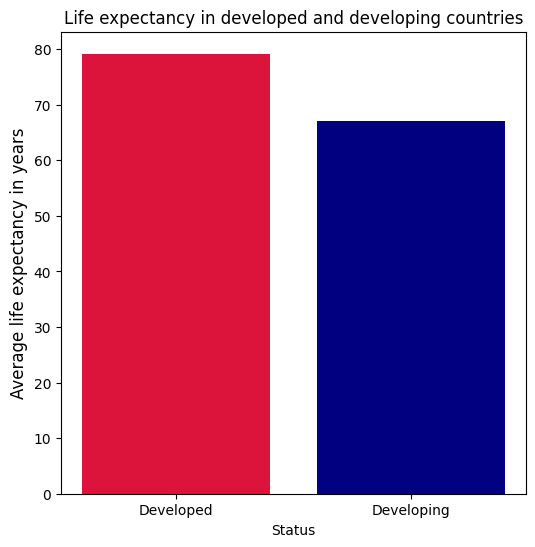

In [238]:
# Life_Expectancy vs Status using bar plot.
plt.figure(figsize=(6,6))
x = df.groupby('Status')['Status'].count().index #developed and developing
y = df.groupby('Status')['Life expectancy'].mean()
color=['crimson','navy']
plt.bar(x,y,color=color)
plt.xlabel("Status",fontsize=10)
plt.ylabel("Average life expectancy in years",fontsize=12)
plt.title("Life expectancy in developed and developing countries")
plt.show()

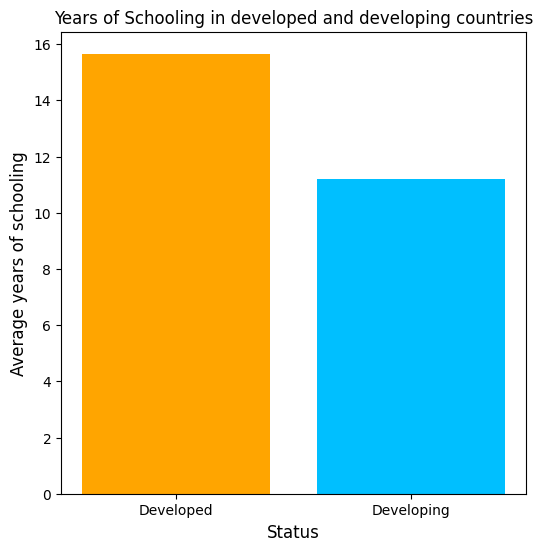

In [241]:
# Schooling vs Status using bar plot.
plt.figure(figsize=(6,6))
x = df.groupby('Status')['Status'].count().index #developed and developing
y = df.groupby('Status')['Schooling'].mean()
color=['orange','deepskyblue']
plt.bar(x,y,color=color)
plt.xlabel("Status",fontsize=12)
plt.ylabel("Average years of schooling",fontsize=12)
plt.title("Years of Schooling in developed and developing countries")
plt.show()

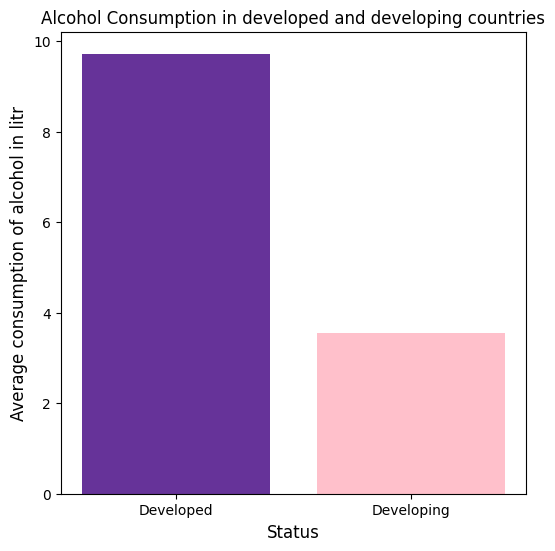

In [242]:
# Alcohol vs Status using bar plot.
plt.figure(figsize=(6,6))
x = df.groupby('Status')['Status'].count().index #developed and developing
y = df.groupby('Status')['Alcohol'].mean()
color=['rebeccapurple','pink']
plt.bar(x,y,color=color)
plt.xlabel("Status",fontsize=12)
plt.ylabel("Average consumption of alcohol in litr",fontsize=12)
plt.title("Alcohol Consumption in developed and developing countries")
plt.show()

## Lastly, we model the data using Scikitlearn linear regression module

In [66]:
x=df.drop('Life expectancy',axis=1)
y= df['Life expectancy']

In [69]:
Country_dummy=pd.get_dummies(x['Country'])
# Dummy variables for Country feature.

status_dummy=pd.get_dummies(x['Status'])
# Dummy variables for status feature.

In [70]:
#replacing the variables with dummy variables
x.drop(['Country','Status'],inplace=True,axis=1)
x=pd.concat([x,Country_dummy,status_dummy],axis=1)

In [72]:
x.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen', 'Zambia',
       'Zimbabwe', 'Developed', 'Developing'],
      dtype='object', length=214)

In [74]:
x.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,False,False,False,False,False,False,False,False,False,True
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,False,False,False,False,False,False,False,False,False,True
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,False,False,False,False,False,False,False,False,False,True
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,False,False,False,False,False,False,False,False,False,True
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,False,False,False,False,False,False,False,False,False,True


In [77]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,34413.603,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,33370.804,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,32269.592,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,31161.378,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,30117.411,18.2,18.2,0.454,9.5


In [78]:
x

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,False,False,False,False,False,False,False,False,False,True
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,False,False,False,False,False,False,False,False,False,True
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,False,False,False,False,False,False,False,False,False,True
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,False,False,False,False,False,False,False,False,False,True
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,False,False,False,False,False,False,False,True,False,True
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,False,False,False,False,False,False,False,True,False,True
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,False,False,False,False,False,False,False,True,False,True
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,False,False,False,False,False,False,False,True,False,True


In [81]:

#test and train split with scikit learn 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=105)

In [87]:
#building the linear regression model with sklearn libraries
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [84]:
y_pred=model.predict(x_test)

In [85]:
from sklearn.metrics import r2_score

r2_score(y_pred, y_test)

0.9618787170846511

In [86]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test)

3.4727908573169954